<a href="https://colab.research.google.com/github/sriloksagar/Intern_ND/blob/master/Data_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generating bounding boxes and using Tesseract for the contents**

**Importing and Installing Libraries**

In [0]:
!pip install tesseract
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import pandas as pd
from PIL import Image

In [0]:
from PIL import Image
import pytesseract

**Mounting Google Drive for importing files**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the files**

In [0]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/Intern_ND/EB_July2019.jpg')
image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

table = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Intern_ND/Dimensions.xlsx')

**Function for returning the desired region**

In [0]:
def Find(text):
    for i in range(len(table['Object'])):
        if table['Object'][i]==text:
            up = table['up'][i]
            down = table['down'][i]
            left = table['left'][i]
            right = table['right'][i]
    boxed_image = image[up:down,left:right]
    plot = Image.fromarray(boxed_image)
    return plot

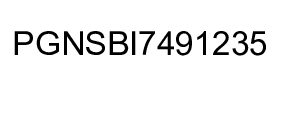

In [0]:
region=Find('Receipt No')
region

**Extracting text from region using Tesseract**



In [0]:
for j in table['Object']:
    text = pytesseract.image_to_string(Find(j))
    print(j,text,'\n')

Service No 09288020442 

Name GIBU KURIAN
MATHEW 

Bill Amount 2490 

Bill Month /Year 7/2019 

Receipt No PGNSBI7491235 

Receipt Date Monday, 1 July
2019 20:12 

Amount Debited 2490.0 

Bank Transaction No IGAGMIJFC6 

Bank Authorisation Id  

Card Type SBI NET BANKING 



In [0]:
text = pytesseract.image_to_string(Find(j))
    print(j,text,'\n')